In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df = pd.read_csv("H2full.csv", dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [3]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [4]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
79325,2017,35
79326,2017,35
79327,2017,35
79328,2017,35


In [5]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
79325    201735
79326    201735
79327    201735
79328    201735
79329    201735
Length: 79330, dtype: object


In [6]:
df2 = DataFrame(c, columns= ['ADR']) 
df2

,ADR
0,0.00
1,76.50
2,68.00
3,76.50
4,76.50
...,...
79325,96.14
79326,225.43
79327,157.71
79328,104.40


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'ADR']

In [9]:
df3
df3.sort_values(['FullDate','ADR'], ascending=True)

,FullDate,ADR
0,201527,0.00
11,201527,43.00
6,201527,58.67
29,201527,60.00
36141,201527,60.00
...,...,...
79084,201735,259.00
79305,201735,266.75
79010,201735,270.00
79091,201735,270.00


In [10]:
df4 = df3.groupby('FullDate').agg("mean")
df4
df4.sort_values(['FullDate'], ascending=True)

,ADR
FullDate,
201527,78.165879
201528,70.247336
201529,73.996534
201530,66.766446
201531,65.363578
...,...
201731,138.898408
201732,142.909221
201733,144.839923


In [11]:
tseries=df4['ADR']
tseries

FullDate
201527     78.165879
201528     70.247336
201529     73.996534
201530     66.766446
201531     65.363578
             ...    
201731    138.898408
201732    142.909221
201733    144.839923
201734    135.892708
201735    128.586952
Name: ADR, Length: 115, dtype: float64

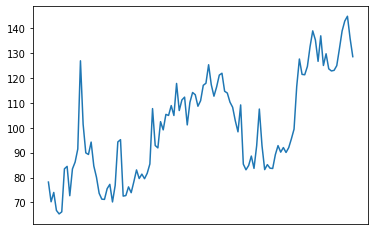

In [12]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [13]:
tseriesr=pd.Series(tseries)
type(tseriesr)

# logvalue=np.log(tseriesr)
train, val = tseriesr[1:80], tseriesr[81:100]

In [14]:
type(val)

pandas.core.series.Series

In [15]:
train

FullDate
201528     70.247336
201529     73.996534
201530     66.766446
201531     65.363578
201532     66.192518
             ...    
201649     84.837840
201650     88.622428
201651     83.677472
201652     92.779574
201653    107.529537
Name: ADR, Length: 79, dtype: float64

In [16]:
val

FullDate
201702     83.177972
201703     85.174068
201704     83.753827
201705     83.629739
201706     89.198766
201707     92.822907
201708     90.204312
201709     92.045259
201710     90.069175
201711     91.995665
201712     95.535019
201713     99.445007
201714    116.586577
201715    127.642365
201716    121.461748
201717    121.316925
201718    124.661435
201719    132.639515
201720    138.961245
Name: ADR, dtype: float64

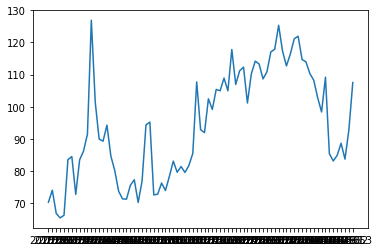

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as ts

plt.plot(train)
plt.show()

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


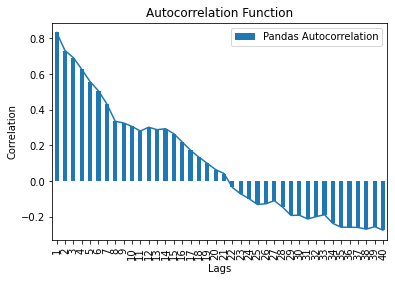

In [18]:
#Autocorrelation Plot
acf_1 =  acf(train)[1:50]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.plot(acf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Autocorrelation Function')
plt.show()

In [19]:
acf_1

array([ 0.83246803,  0.73093537,  0.69143199,  0.62636525,  0.55657161,
        0.50502255,  0.43180363,  0.33424774,  0.32509723,  0.30566049,
        0.27983014,  0.30114861,  0.28722728,  0.29270836,  0.26489185,
        0.21832936,  0.17174955,  0.13287983,  0.09859801,  0.06337267,
        0.04147846, -0.03646029, -0.07309126, -0.10001382, -0.13228332,
       -0.12820569, -0.11073773, -0.14703762, -0.19365169, -0.19245819,
       -0.21358647, -0.2002938 , -0.18949865, -0.23814009, -0.25992862,
       -0.2599262 , -0.2609403 , -0.27053204, -0.2566954 , -0.27626949])

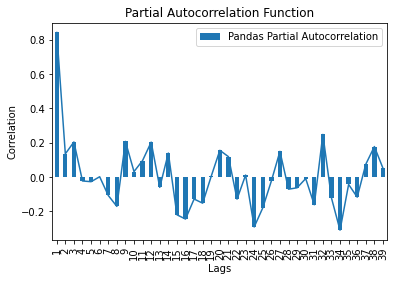

In [20]:
#Partial Autocorrelation Plot
pacf_1 =  pacf(train)[1:40]
val_df = pd.DataFrame([pacf_1]).T
val_df.columns = ['Pandas Partial Autocorrelation']
val_df.index += 1
val_df.plot(kind='bar')
plt.plot(pacf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Partial Autocorrelation Function')
plt.show()

In [21]:
pacf_1

array([ 0.8431407 ,  0.13501421,  0.20422753, -0.02325977, -0.02750434,
        0.00134784, -0.10767254, -0.17161454,  0.20760712,  0.03134401,
        0.09602851,  0.20337058, -0.06066303,  0.1394679 , -0.2205868 ,
       -0.2455749 , -0.1288192 , -0.15289789,  0.00511981,  0.15555502,
        0.11849686, -0.12921007,  0.01113639, -0.29171514, -0.18024721,
       -0.02343249,  0.14943537, -0.07134357, -0.06301893, -0.00929429,
       -0.16211679,  0.24836567, -0.12214682, -0.31039361, -0.04344405,
       -0.11760625,  0.07410918,  0.17740217,  0.05110152])

In [22]:
#Dickey-Fuller Test
result = ts.adfuller(train)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.023501
p-value: 0.276365
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587


In [23]:
# https://www.kdnuggets.com/2018/02/google-colab-free-gpu-tutorial-tensorflow-keras-pytorch.html/2
# https://pypi.org/project/pyramid-arima/
!pip install -q pyramid-arima==0.9.0

In [24]:
from pyramid.arima import auto_arima
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=52, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

/home/michael/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/michael/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=208.770, BIC=211.286, Fit time=0.146 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=207.842, BIC=211.617, Fit time=0.410 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=202.440, BIC=207.473, Fit time=1.846 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=204.844, BIC=212.392, Fit time=3.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=201.827, BIC=205.601, Fit time=1.157 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=202.236, BIC=207.268, Fit time=2.179 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=203.124, BIC=209.414, Fit time=2.401 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 11.206 seconds


/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


In [25]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   79
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 52)   Log Likelihood                 -97.913
Date:                            Wed, 18 Mar 2020   AIC                            201.827
Time:                                    11:34:32   BIC                            205.601
Sample:                                         0   HQIC                           202.913
                                             - 79                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.4208      0.270     -5.253      0.000      -1.951      -0.891
ma.L1         -0.9995     53.251     -0.019      0.985    -105.369     103.370
sigma2        96.3347   5105.893      0.019      0.985   -9911.032    1.01e+04
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                19.74
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                            -0.98
Prob(H) (two-sided):                  0.44   Kurtosis:                         6.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=19), index=val.index)
prediction.columns = ['Predicted_Cancellations']
predictions=prediction['Predicted_Cancellations']

In [27]:
val

FullDate
201702     83.177972
201703     85.174068
201704     83.753827
201705     83.629739
201706     89.198766
201707     92.822907
201708     90.204312
201709     92.045259
201710     90.069175
201711     91.995665
201712     95.535019
201713     99.445007
201714    116.586577
201715    127.642365
201716    121.461748
201717    121.316925
201718    124.661435
201719    132.639515
201720    138.961245
Name: ADR, dtype: float64

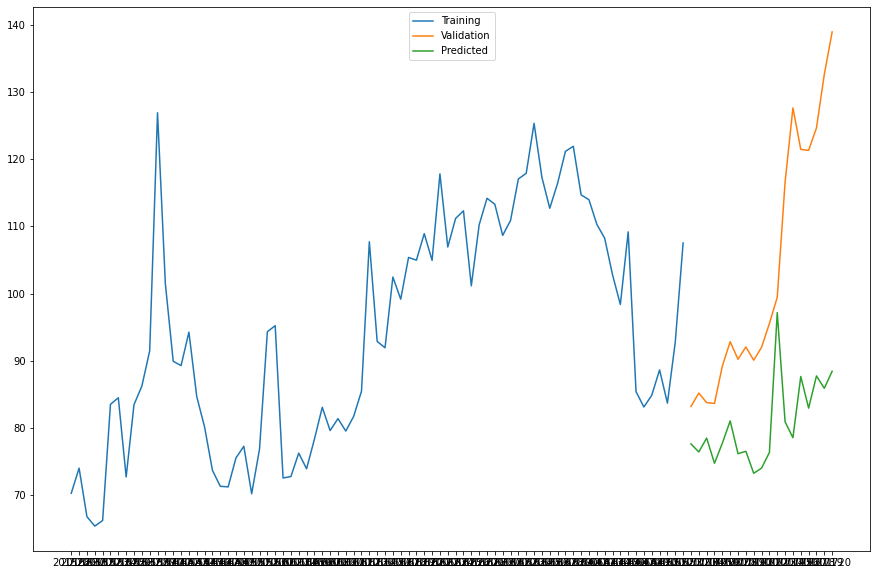

In [28]:
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(val, label='Validation')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper center')
plt.show()

In [29]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [30]:
type(predictions)

pandas.core.series.Series

In [31]:
mda(val, predictions)

0.8947368421052632

In [32]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(val, predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 27.447163


In [33]:
test=tseries.iloc[100:115]
test = np.array(test)
test.shape

(15,)

In [34]:
test=test.reshape(-1)
test

array([135.29018595, 126.70549121, 136.96731501, 125.04368653,
       129.75435252, 123.69777658, 122.84483755, 123.08675055,
       124.98114286, 131.79458537, 138.89840845, 142.90922096,
       144.83992318, 135.89270833, 128.58695175])

In [35]:
test.shape

(15,)

In [36]:
test = pd.Series(test)

In [37]:
predictionnew=pd.DataFrame(Arima_model.predict(n_periods=15), index=test.index)
predictionnew.columns = ['Unseen_Predicted_Cancellations']
predictionsnew=predictionnew['Unseen_Predicted_Cancellations']

In [38]:
mse_new = mean_squared_error(test, predictionsnew)
rmse_new = math.sqrt(mse_new)
print('RMSE: %f' % rmse_new)

RMSE: 52.772254


In [39]:
mda(test, predictionsnew)

0.8666666666666667

In [40]:
forecast_error_new = (predictionsnew-test)
forecast_error_new

0    -57.678729
1    -50.304812
2    -58.497665
3    -50.323889
4    -52.044820
5    -42.666141
6    -46.696873
7    -46.583069
8    -51.749694
9    -57.800156
10   -62.571103
11   -45.745776
12   -63.940974
13   -57.363415
14   -40.944125
dtype: float64

In [41]:
mean_forecast_error_new = np.mean(forecast_error_new)
mean_forecast_error_new

-52.327416116808195

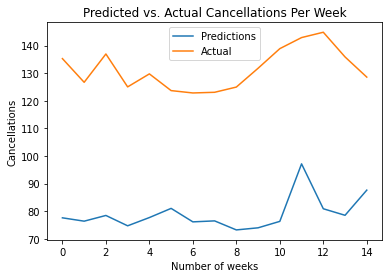

In [42]:
predictons, =plt.plot(predictionsnew, label='Predictions')
actual, =plt.plot(test, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()